In [17]:
from taskontrol.core import statematrix
from __future__ import print_function
import networkx as nx
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sm = statematrix.StateMatrix(inputs={'C':0, 'L':1, 'R':2},
                             outputs={'centerWater':0, 'centerLED':1},
                             readystate='ready_next_trial')

sm.add_state(name='wait_for_cpoke', statetimer=12,
            transitions={'Cin':'play_target'},
            outputsOff=['centerLED'])
sm.add_state(name='play_target', statetimer=0.5,
            transitions={'Cout':'wait_for_apoke','Tup':'wait_for_cpoke'},
            outputsOn=['centerLED'])
sm.add_state(name='wait_for_apoke', statetimer=2,
            transitions={'Rin':'ready_next_trial','Lin':'wait_for_cpoke','Tup':'wait_for_cpoke'},
            outputsOff=['centerLED'])

print(sm)

# wait_for_apoke is not printed in matrix


			Cin	Cout	Lin	Lout	Rin	Rout	Tup		Timers	Outputs	SerialOut
ready_next_trial [0] 	0	0	0	0	0	0	0	|	100.00	--	0
wait_for_cpoke   [1] 	2	1	1	1	1	1	1	|	12.00	-0	0
play_target      [2] 	2	3	2	2	2	2	1	|	0.50	-1	0
wait_for_apoke   [3] 	3	3	1	3	0	3	1	|	2.00	-0	0



In [3]:
sm.stateMatrix

[[0, 0, 0, 0, 0, 0, 0],
 [2, 1, 1, 1, 1, 1, 1],
 [2, 3, 2, 2, 2, 2, 1],
 [3, 3, 1, 3, 0, 3, 1]]

In [4]:
sm.statesIndexToName

{0: 'ready_next_trial',
 1: 'wait_for_cpoke',
 2: 'play_target',
 3: 'wait_for_apoke'}

In [5]:
sm.readyForNextTrialStateName

'ready_next_trial'

In [21]:
sm.eventsDict

{'Cin': 0,
 'Cout': 1,
 'Forced': -1,
 'Lin': 2,
 'Lout': 3,
 'Rin': 4,
 'Rout': 5,
 'Tup': 6}

In [36]:
invertEventsDict = {v: k for k, v in sm.eventsDict.iteritems()}

In [38]:
invertEventsDict

{-1: 'Forced',
 0: 'Cin',
 1: 'Cout',
 2: 'Lin',
 3: 'Lout',
 4: 'Rin',
 5: 'Rout',
 6: 'Tup'}

In [8]:
sm.get_states_dict()

{'play_target': 2,
 'ready_next_trial': 0,
 'wait_for_apoke': 3,
 'wait_for_cpoke': 1}

In [9]:
stateGraph = nx.MultiDiGraph()

In [10]:
sm.readyForNextTrialStateName

'ready_next_trial'

In [60]:
# If index is True it will plot the row/state number, else it prints the state name
def plot_transitions(stateGraph, stateMatrix, statesDict, index=False, verbose=True):
    for key in statesDict.keys():
        value = statesDict[key]
        if sm.readyForNextTrialStateName != key:
            transitions = stateMatrix[statesDict[key]]

            for transition in transitions:
                #print(invertEventsDict[transition])
                if verbose: print(value, transition)
                if index:
                    stateGraph.add_edge(value, transition, path=invertEventsDict[transition])
                else:
                    stateGraph.add_edge(sm.statesIndexToName[value], sm.statesIndexToName[transition], path=invertEventsDict[transition])
    

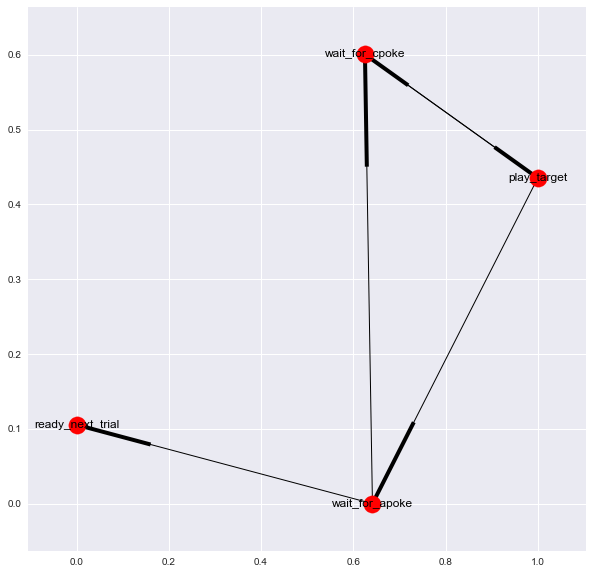

In [61]:
stateGraph = nx.DiGraph()
stateMatrix = sm.stateMatrix
statesDict = sm.get_states_dict()

plt.figure(figsize=(10,10))
plot_transitions(stateGraph, stateMatrix, statesDict, index=False, verbose=False)
nx.draw_networkx(stateGraph)

In [62]:
stateGraph.nodes()

['wait_for_cpoke', 'ready_next_trial', 'play_target', 'wait_for_apoke']

In [63]:
stateGraph.neighbors('wait_for_cpoke')

['wait_for_cpoke', 'play_target']

In [64]:
stateGraph.neighbors('wait_for_apoke')

['wait_for_cpoke', 'ready_next_trial', 'wait_for_apoke']

In [65]:
stateGraph['wait_for_apoke']['ready_next_trial']['path']

'Cin'